# Example CutOut

In [1]:
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=12,8

In [2]:
from LLC_rearrange import LLCtransformation

## Load from catalog and make OceanSpy Dataset

In [3]:
od = ospy.open_oceandataset.from_catalog('LLC4320', None)

Opening LLC4320.


/home/mjimen17/anaconda3/envs/Oceanography/lib/python3.7/site-packages/oceanspy/open_oceandataset.py:1: UserWarning: ['grid_type'] are not OceanSpy parameters
  """


horizontal grid for LLC4320, a general, curvilinear ocean simulations on the cube-sphere.
Citation:
 * Paper.


# Create Mates for Vector Fields

This becomes increadibly handy for when need to rotate faces, and thus the local X-aligned vector is really is y-aligned.

In [4]:
vars_mates = ['ADVx_SLT','ADVy_SLT','ADVx_TH','ADVy_TH','DFxE_TH', 'DFyE_TH','DFxE_SLT', 'DFyE_SLT', 'maskW', 'maskS',
              'TAUX', 'TAUY', 'U', 'V', 'UVELMASS', 'VVELMASS', 'dxC', 'dyC', 'dxG', 'dyG', 'hFacW','hFacS', 'rAw', 'rAs']
for k in range(int(len(vars_mates) / 2) ):
    nk = 2 * k
    if vars_mates[nk] in od._ds.variables:
        print([vars_mates[nk],vars_mates[nk+1]])
        od._ds[vars_mates[nk]].attrs['mates'] = vars_mates[nk+1]
        od._ds[vars_mates[nk+1]].attrs['mates'] = vars_mates[nk]

['dxC', 'dyC']
['dxG', 'dyG']
['hFacW', 'hFacS']
['rAw', 'rAs']


In [5]:
_ds = od._ds.reset_coords().drop_vars(['CS','PHrefC', 'PHrefF', 'SN', 'k_l', 'k_u', 'drF', 'Zl', 'Zu'])
od._ds = _ds

# Transform Data by Rotating Faces

In [6]:
varlist = ['Depth', 'SST', 'XC', 'XG', 'YC', 'YG', 'dxC', 'dxG', 'dyC', 'dyG']
faces=[2, 6, 10]

In [7]:
DS = LLCtransformation.arctic_crown(_ds.isel(time=slice(0,2)), varlist, centered='Atlantic',faces=faces)

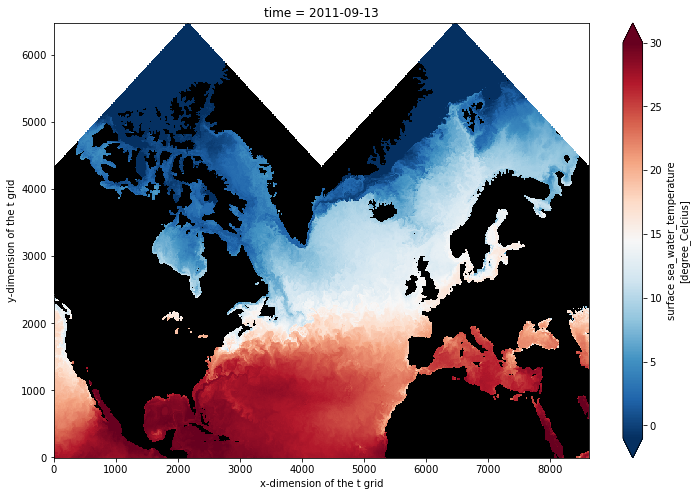

In [8]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['SST'].isel(time=0, X=slice(0,-1,10),Y=slice(0,-1,10))).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0)).plot(cmap='RdBu_r', vmin=-1, vmax=30)
plt.show()

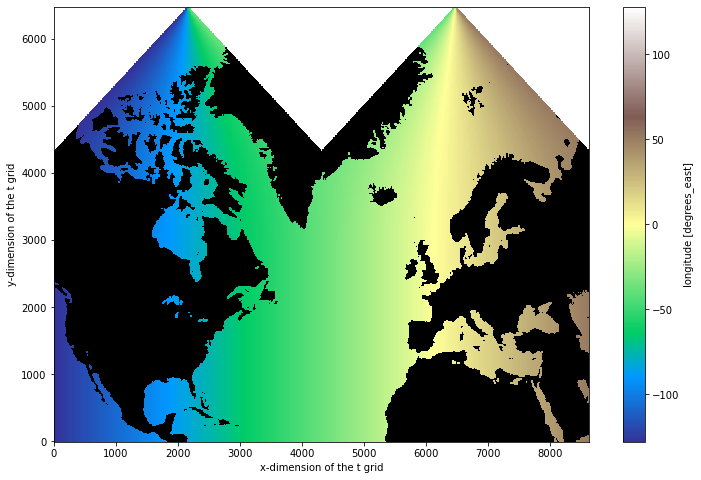

In [9]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['XC'].isel(X=slice(0,-1,10),Y=slice(0,-1,10))).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0)).plot(cmap='terrain')
plt.show()

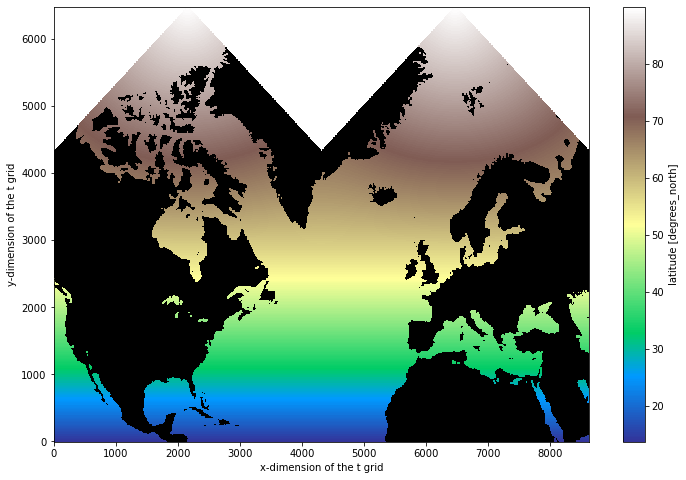

In [10]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['YC'].isel(X=slice(0,-1,10),Y=slice(0,-1,10))).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0)).plot(cmap='terrain')
plt.show()

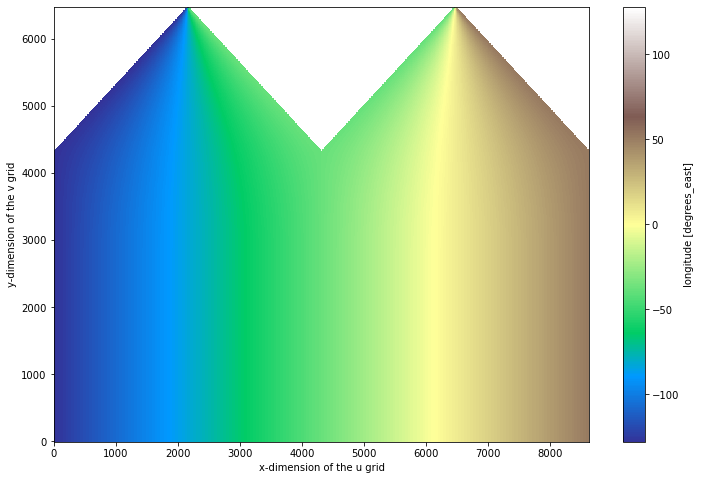

In [11]:
((DS['XG'].isel(Xp1=slice(0,-1,10),Yp1=slice(0,-1,10)))).plot(cmap='terrain')
plt.show()

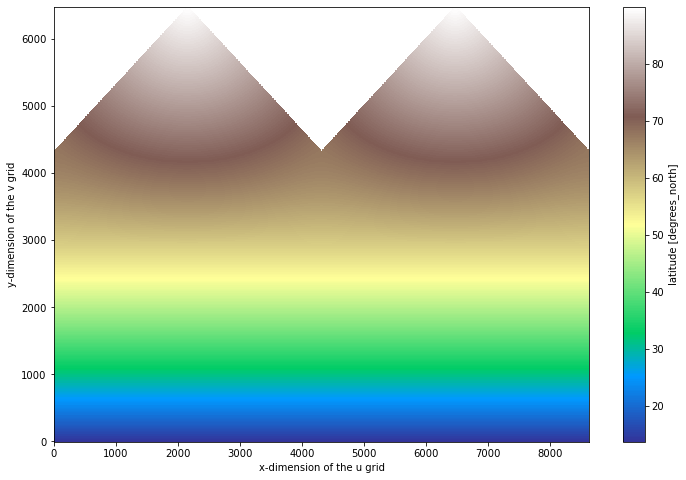

In [12]:
((DS['YG'].isel(Xp1=slice(0,-1,10),Yp1=slice(0,-1,10)))).plot(cmap='terrain')
plt.show()

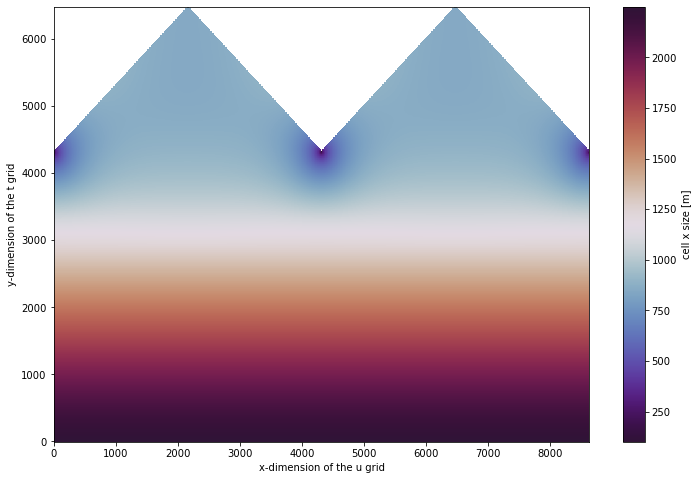

In [13]:
((DS['dxC'].isel(Xp1=slice(0,-1,10),Y=slice(0,-1,10)))).plot(cmap='twilight_shifted')
plt.show()

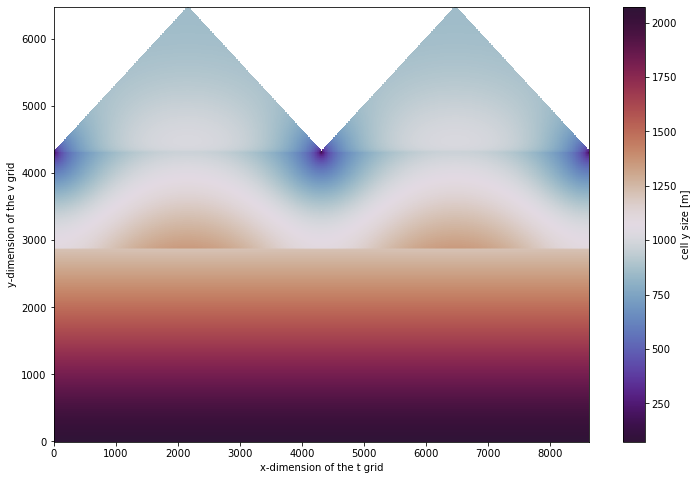

In [14]:
((DS['dyC'].isel(X=slice(0,-1,10),Yp1=slice(0,-1,10)))).plot(cmap='twilight_shifted')
plt.show()

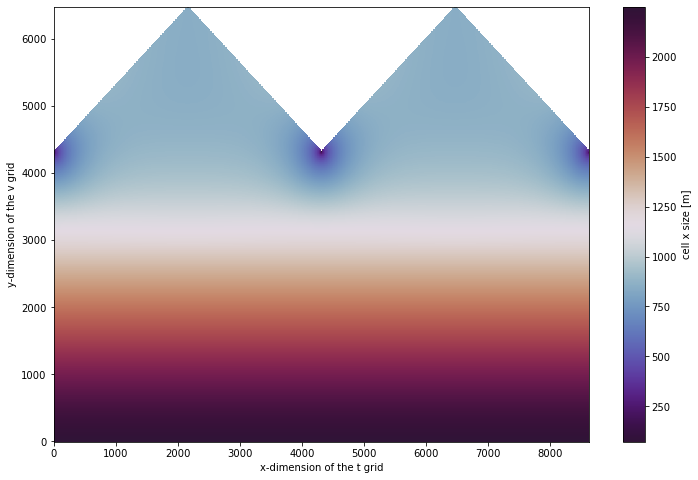

In [15]:
((DS['dxG'].isel(X=slice(0,-1,10),Yp1=slice(0,-1,10)))).plot(cmap='twilight_shifted')
plt.show()

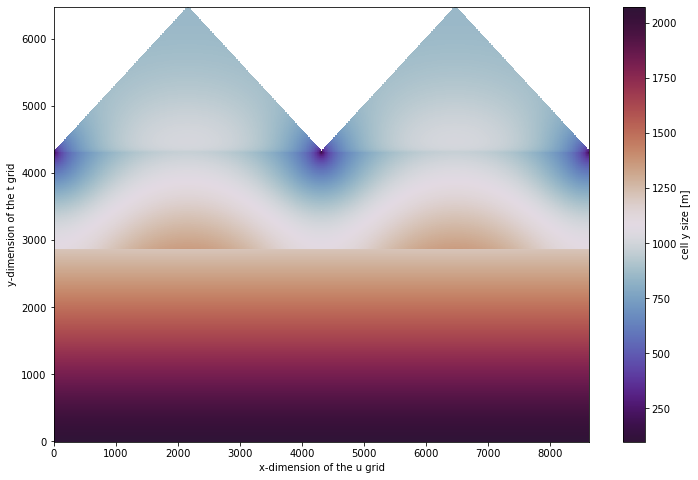

In [16]:
((DS['dyG'].isel(Xp1=slice(0,-1,10),Y=slice(0,-1,10)))).plot(cmap='twilight_shifted')
plt.show()

## Centered around Arctic Ocean (North Atlantic at bottom)

In [17]:
DS = LLCtransformation.arctic_centered(_ds.isel(time=slice(0,2)), varlist, centered='Atlantic')

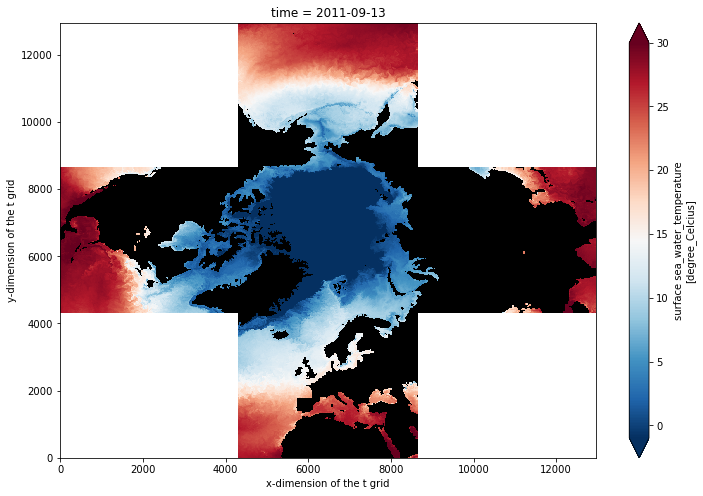

In [18]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['SST'].isel(time=0, X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='RdBu_r', vmin=-1, vmax=30)
plt.show()

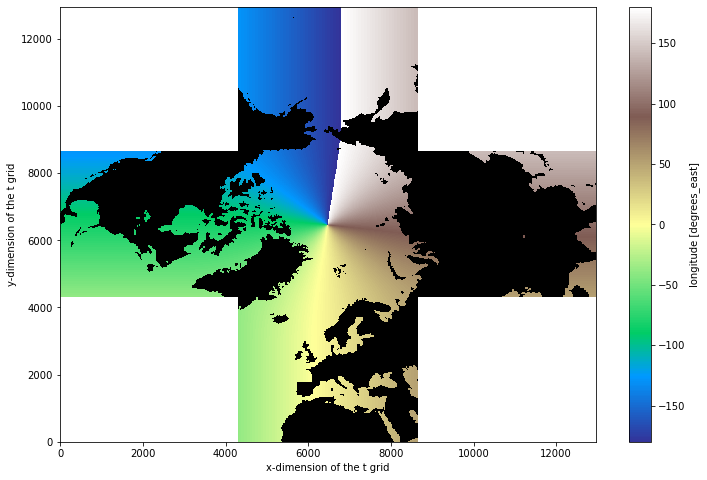

In [19]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['XC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='terrain')
plt.show()

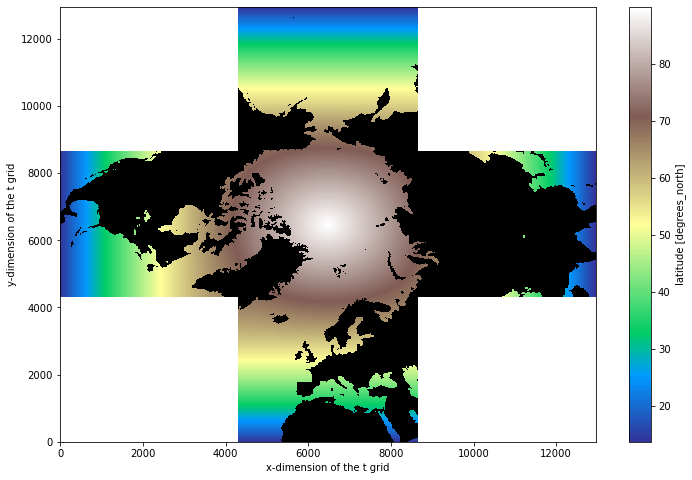

In [20]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['YC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='terrain')
plt.show()

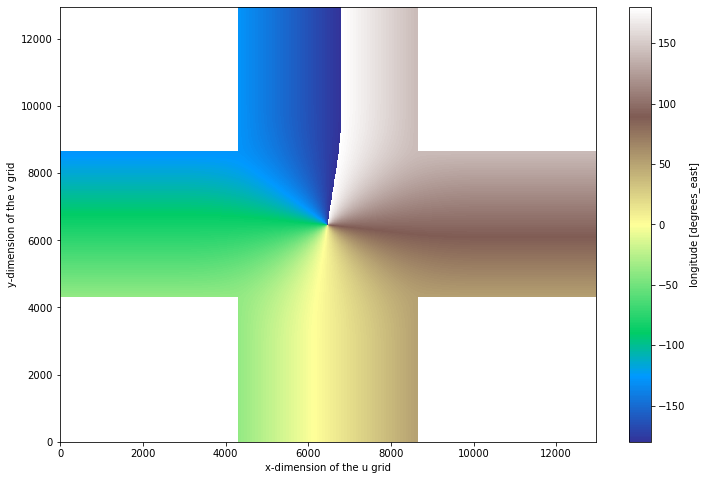

In [21]:
(DS['XG'].isel(Xp1=slice(0,-1,10), Yp1=slice(0,-1,10))).plot(cmap='terrain')
plt.show()

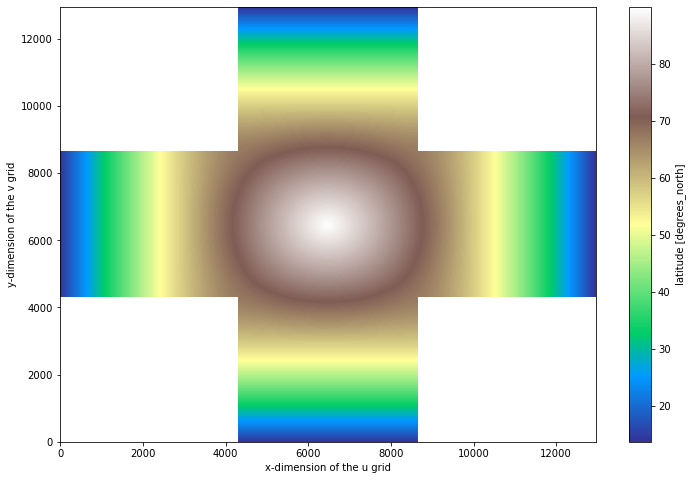

In [22]:
(DS['YG'].isel(Xp1=slice(0,-1,10), Yp1=slice(0,-1,10))).plot(cmap='terrain')
plt.show()

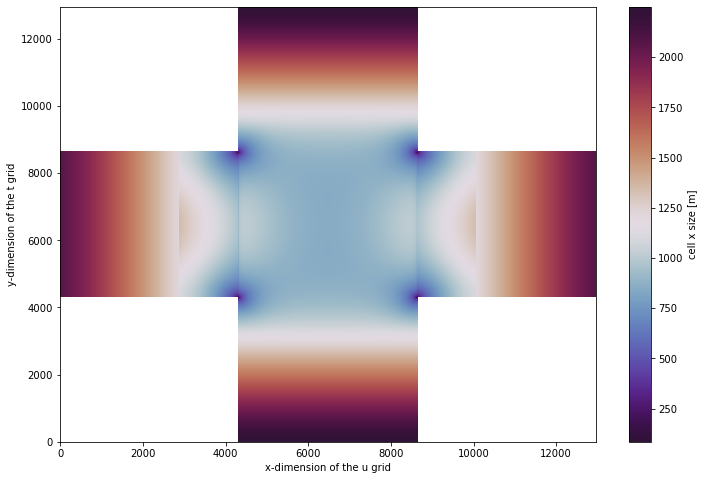

In [23]:
(DS['dxC'].isel(Xp1=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='twilight_shifted')
plt.show()

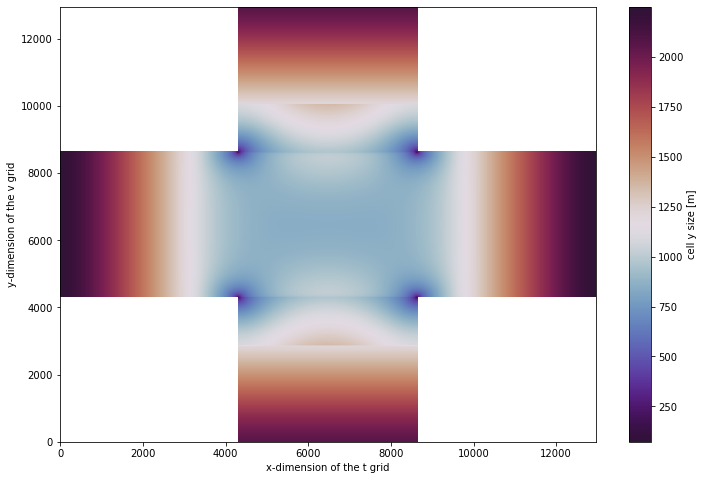

In [24]:
(DS['dyC'].isel(X=slice(0,-1,10), Yp1=slice(0,-1,10))).plot(cmap='twilight_shifted')
plt.show()

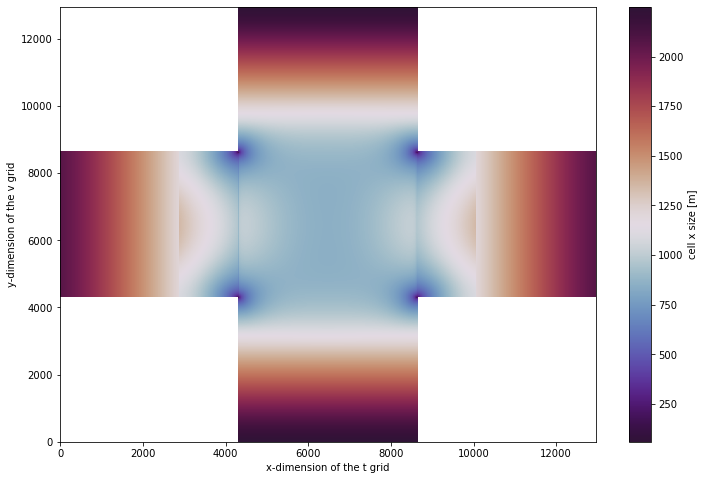

In [25]:
(DS['dxG'].isel(X=slice(0,-1,10), Yp1=slice(0,-1,10))).plot(cmap='twilight_shifted')
plt.show()

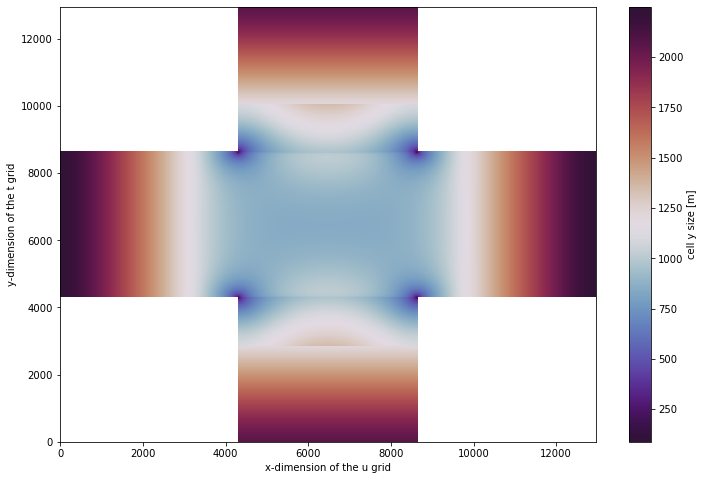

In [26]:
(DS['dyG'].isel(Xp1=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='twilight_shifted')
plt.show()

## Pacific Ocean on bottom

In [27]:
DS = LLCtransformation.arctic_centered(_ds.isel(time=slice(0,2)), varlist, centered='Pacific')

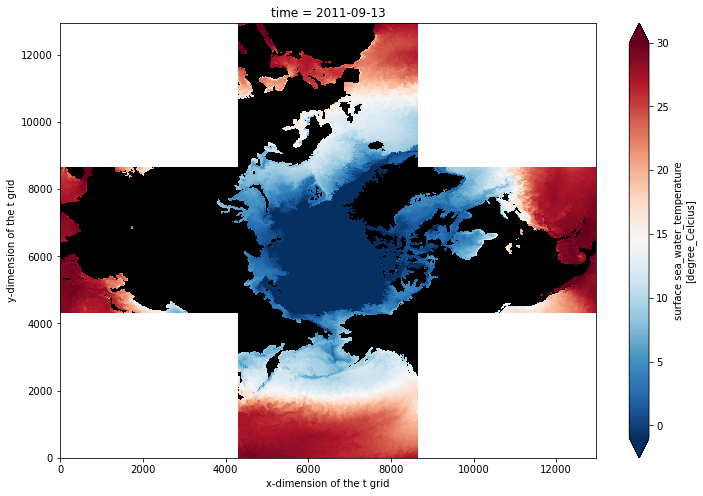

In [28]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['SST'].isel(time=0, X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='RdBu_r', vmin=-1, vmax=30)
plt.show()

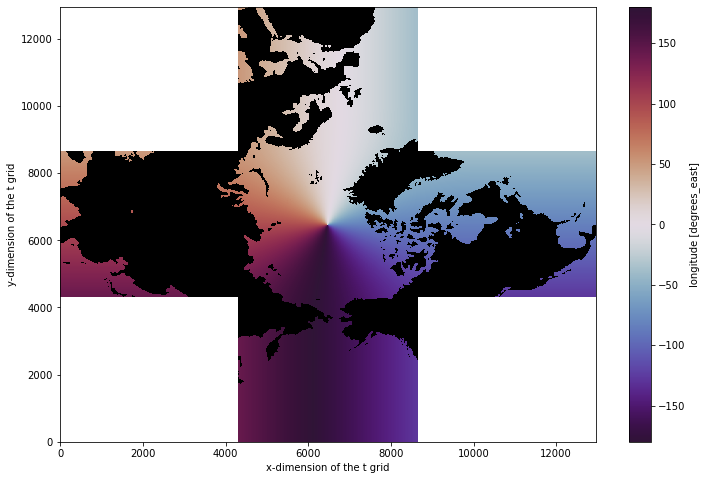

In [29]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['XC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='twilight_shifted')
plt.show()

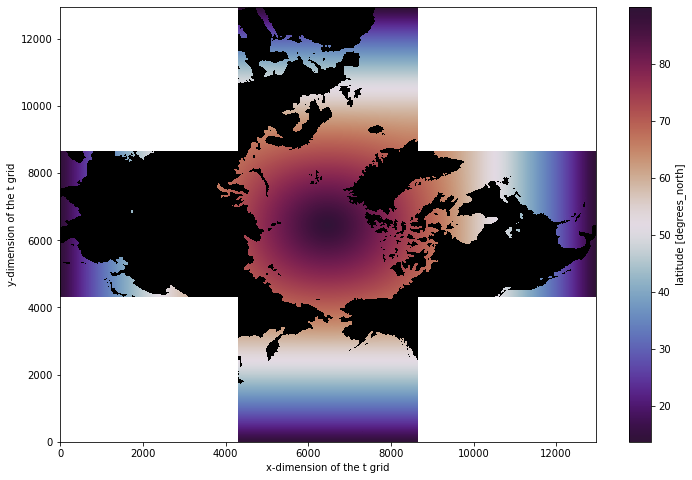

In [30]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['YC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='twilight_shifted')
plt.show()